# 📘 License Plate Recognition - Dheeraj Battini
This notebook performs full License Plate Recognition using YOLOv5 detection outputs and Tesseract OCR.

✅ LABEL_DIR: LicensePlateYOLO/runs_detect/test_results/labels
📄 Label Files Found: ['1000.txt', '1001.txt', '1002.txt', '1003.txt', '1004.txt'] ...

🔁 Processing: 1000.txt
🔍 Looking for: LicensePlateYOLO/test\1000.jpg
🔡 Detected Text: 95573
🔁 Processing: 1001.txt
🔍 Looking for: LicensePlateYOLO/test\1001.jpg
🔡 Detected Text: 173559116
🔁 Processing: 1002.txt
🔍 Looking for: LicensePlateYOLO/test\1002.jpg
🔡 Detected Text: 
🔁 Processing: 1003.txt
🔍 Looking for: LicensePlateYOLO/test\1003.jpg
🔡 Detected Text: FRIES
🔁 Processing: 1004.txt
🔍 Looking for: LicensePlateYOLO/test\1004.jpg
🔡 Detected Text: 
🔡 Detected Text: 76542714
🔁 Processing: 1005.txt
🔍 Looking for: LicensePlateYOLO/test\1005.jpg
🔡 Detected Text: 134558
🔁 Processing: 1006.txt
🔍 Looking for: LicensePlateYOLO/test\1006.jpg
🔡 Detected Text: 180wy228
🔁 Processing: 1007.txt
🔍 Looking for: LicensePlateYOLO/test\1007.jpg
🔡 Detected Text: 13876070
🔁 Processing: 1008.txt
🔍 Looking for: LicensePlateYOLO/test\1008.jpg
🔡 Detected Text: 
🔁

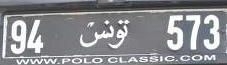

🔎 Detected Text (sample): 95573


In [10]:
# 📦 STEP 1: Imports (Run this cell first)
import cv2
import os
import pandas as pd
import pytesseract
from IPython.display import Image, display

# 📂 STEP 2: Define all paths
TEST_DIR = "LicensePlateYOLO/test"
LABEL_DIR = "LicensePlateYOLO/runs_detect/test_results/labels"
CROP_DIR = "LicensePlateYOLO/cropped_plates"
OUTPUT_CSV = "LicensePlateYOLO/submission.csv"

os.makedirs(CROP_DIR, exist_ok=True)

# ✅ Load label files
label_files = [f for f in os.listdir(LABEL_DIR) if f.endswith(".txt")]
print(f"✅ LABEL_DIR: {LABEL_DIR}")
print(f"📄 Label Files Found: {label_files[:5]} ...\n")

# 🧠 STEP 3: Crop detected license plates and run OCR
results = []

for label_file in label_files:
    print(f"🔁 Processing: {label_file}")
    image_file = label_file.replace(".txt", ".jpg")
    image_path = os.path.join(TEST_DIR, image_file)
    print(f"🔍 Looking for: {image_path}")

    if not os.path.exists(image_path):
        print("❌ Image not found.")
        continue

    img = cv2.imread(image_path)
    if img is None:
        print("❌ Failed to read image.")
        continue

    h, w = img.shape[:2]

    with open(os.path.join(LABEL_DIR, label_file), 'r') as f:
        for i, line in enumerate(f):
            parts = line.strip().split()
            if len(parts) < 5:
                print("⚠️ Invalid YOLO label format, skipping line.")
                continue

            _, x, y, bw, bh = map(float, parts[:5])
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)

            crop = img[y1:y2, x1:x2]
            crop_name = f"{image_file.replace('.jpg', '')}_plate{i+1}.jpg"
            crop_path = os.path.join(CROP_DIR, crop_name)

            if crop.size == 0:
                print("⚠️ Skipping empty crop.")
                continue

            cv2.imwrite(crop_path, crop)

            # 🧠 OCR logic
            gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            text = pytesseract.image_to_string(thresh, config='--psm 7')
            cleaned = ''.join(filter(str.isalnum, text))

            print("🔡 Detected Text:", cleaned)

            results.append({
                'image_id': crop_name.replace('.jpg', ''),
                'label': cleaned
            })

# 📝 STEP 4: Save results to CSV
print("\n🧾 Total OCR results:", len(results))
if results:
    print("📌 Sample result:", results[0])
else:
    print("⚠️ No OCR results to save. Check detection and paths.")

df = pd.DataFrame(results)
df.to_csv(OUTPUT_CSV, index=False)
print("✅ OCR complete. Results saved to:", OUTPUT_CSV)

# 👁️‍🗨️ STEP 5: Display one sample cropped plate and result
if len(results) > 0:
    sample_crop = os.path.join(CROP_DIR, results[0]['image_id'] + ".jpg")
    if os.path.exists(sample_crop):
        display(Image(filename=sample_crop))
        print("🔎 Detected Text (sample):", results[0]['label'])


✅ End of Notebook. Please ensure paths and dependencies are correct if you are running on a new system.